# Binary Classification of Machine Failures

In [4]:
# basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Reading in file
train_file_path = r"C:\Users\Bill Chan\Python Stuff\Kaggle Projects\Binary Classification of Machine Failures\input\train.csv"
test_file_path = r"C:\Users\Bill Chan\Python Stuff\Kaggle Projects\Binary Classification of Machine Failures\input\test.csv"
training = pd.read_csv(train_file_path)
test = pd.read_csv(test_file_path)


## Basic EDA (Exploratory Data Analysis)

The focus on this section would be to get a prelimary understanding of the patterns in the presented data. <br>
I'd like to separate the data into several different sets to create cleaner, more straightforward analysis.

In [6]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [7]:
training.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


### Separate data into different types -- categorical, numerical, binary etc
The reason is that we would conduct our data exploration on the

In [8]:
# quick look at the data's numerical values
# in this case, it'll include everytthing except Product ID
training.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
num_cols = training.columns[3:8]
binary_cols = training.columns[-5:]
cat_cols = training.columns[1:3]
df_nums = training[num_cols]
df_binary = training[binary_cols]
df_cat = training[cat_cols]

print(num_cols)
print(binary_cols)
print(cat_cols)

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'],
      dtype='object')
Index(['TWF', 'HDF', 'PWF', 'OSF', 'RNF'], dtype='object')
Index(['Product ID', 'Type'], dtype='object')


### Catergorical Data Exploration

In [10]:
training['id_letter'] = training['Product ID'].apply(lambda x : x[0])
id_not_type = sum(training['id_letter'] != training['Type'])
weird_length_ids = sum(training['Product ID'].apply(lambda x: len(x) != 6))
unique_prod_id = len(pd.unique(training['Product ID']))


print(f'there are {id_not_type} entries where first letter of product id is different from its type')
print(f'there are {weird_length_ids} Product Ids that are not 6 characters long')
print(f'there are {unique_prod_id} unique product IDs out of {len(training)} products')


there are 0 entries where first letter of product id is different from its type
there are 0 Product Ids that are not 6 characters long
there are 9976 unique product IDs out of 136429 products


We see that there're no entries where the first letter of the product id is the same as the Type. we can omit the letter from product id and just take the numbers.
We also see that none of the product ID exceeds 6 characters (meaning, 5 numbers). BUT, since there are only 9976 unique ID's (less than 10%), we might as well ignore the product ID column

In [11]:
# compare Type and Machine Failure

temp = pd.pivot_table(training, index = 'Machine failure', columns = training['Type'], values = 'Type', aggfunc = 'count')
print(temp)


Type                H      L      M
Machine failure                    
0                8807  93759  31715
1                 116   1595    437


### Numerical Data Exploration

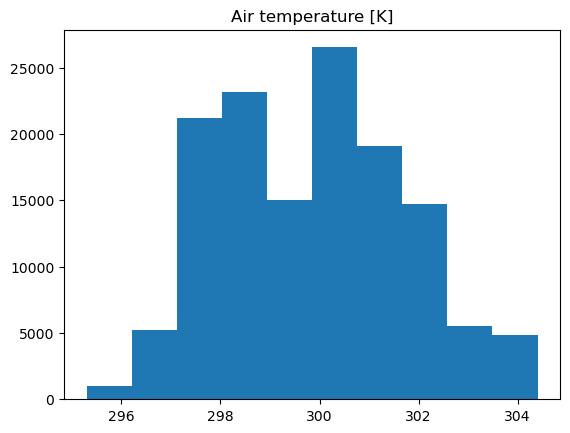

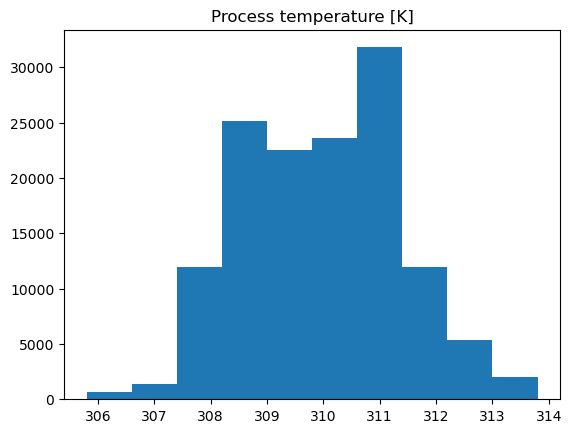

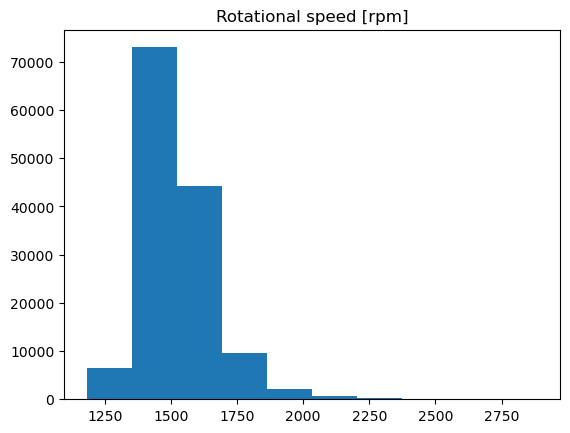

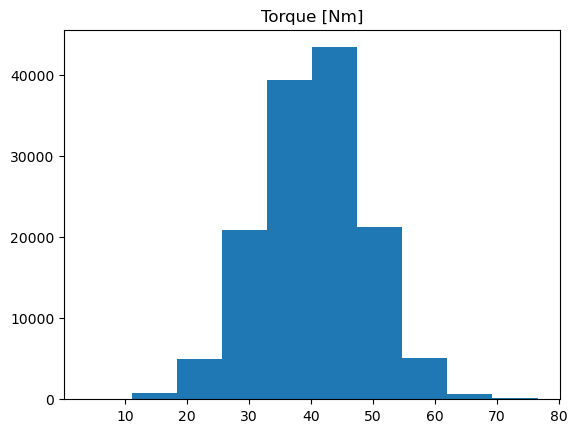

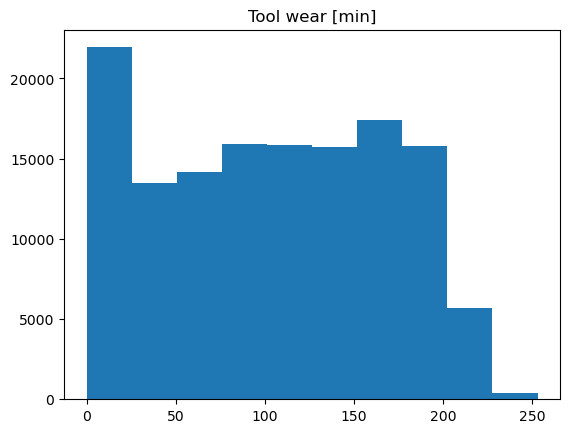

In [12]:
for i in df_nums:
    plt.hist(df_nums[i])
    plt.title(i)
    plt.show()

                         Air temperature [K]  Process temperature [K]  \
Air temperature [K]                 1.000000                 0.856080   
Process temperature [K]             0.856080                 1.000000   
Rotational speed [rpm]              0.016545                 0.011263   
Torque [Nm]                        -0.006773                -0.006298   
Tool wear [min]                     0.016994                 0.012777   

                         Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  
Air temperature [K]                    0.016545    -0.006773         0.016994  
Process temperature [K]                0.011263    -0.006298         0.012777  
Rotational speed [rpm]                 1.000000    -0.779394         0.003983  
Torque [Nm]                           -0.779394     1.000000        -0.003148  
Tool wear [min]                        0.003983    -0.003148         1.000000  


<Axes: >

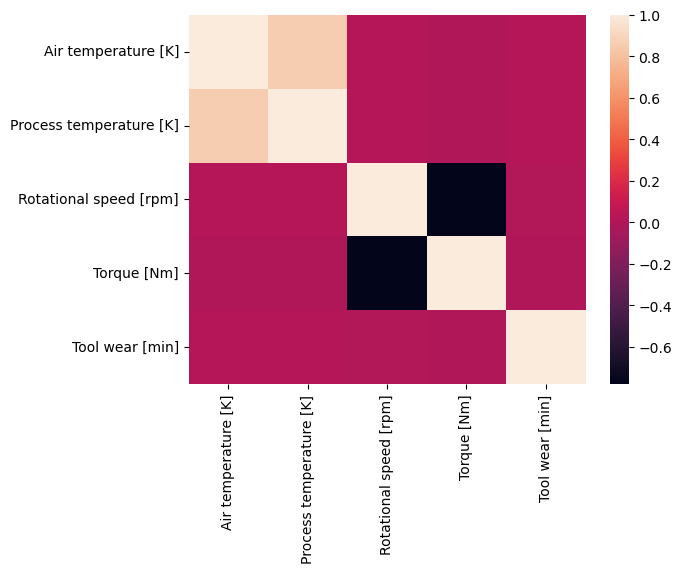

In [13]:
print(df_nums.corr())
sns.heatmap(df_nums.corr())

In [14]:
# verifying relationship between torque and rotational speed
training[['Torque [Nm]','Rotational speed [rpm]']]

,Torque [Nm],Rotational speed [rpm]
0,36.1,1596
1,29.1,1759
2,26.5,1805
3,44.3,1524
4,35.4,1641
...,...,...
136424,37.5,1530
136425,49.1,1447
136426,38.5,1524
136427,46.3,1447


In [15]:
print(df_nums.mean())

Air temperature [K]         299.862776
Process temperature [K]     309.941070
Rotational speed [rpm]     1520.331110
Torque [Nm]                  40.348643
Tool wear [min]             104.408901
dtype: float64


In [16]:

# or maybe i can start with more pivot tables, here goes :
pd.pivot_table(training, index = 'Machine failure', values = num_cols)


,Air temperature [K],Process temperature [K],Rotational speed [rpm],Tool wear [min],Torque [Nm]
Machine failure,,,,,
0,299.846820,309.935645,1521.399148,103.952234,40.191867
1,300.860242,310.280214,1453.563315,132.957169,50.149395


In [17]:
for i in num_cols:
    print(training[[i,'Machine failure']].corr(), '\n')

                     Air temperature [K]  Machine failure
Air temperature [K]             1.000000         0.067744
Machine failure                 0.067744         1.000000 

                         Process temperature [K]  Machine failure
Process temperature [K]                 1.000000         0.030966
Machine failure                         0.030966         1.000000 

                        Rotational speed [rpm]  Machine failure
Rotational speed [rpm]                1.000000        -0.060868
Machine failure                      -0.060868         1.000000 

                 Torque [Nm]  Machine failure
Torque [Nm]         1.000000         0.145793
Machine failure     0.145793         1.000000 

                 Tool wear [min]  Machine failure
Tool wear [min]         1.000000         0.056448
Machine failure         0.056448         1.000000 



In this case we see that they are generally negatively correlated

### Binary Data Exploration

          TWF       HDF       PWF       OSF       RNF
TWF  1.000000  0.010145  0.039927  0.036041  0.002044
HDF  0.010145  1.000000  0.046680  0.067149  0.000885
PWF  0.039927  0.046680  1.000000  0.090016  0.000827
OSF  0.036041  0.067149  0.090016  1.000000 -0.000539
RNF  0.002044  0.000885  0.000827 -0.000539  1.000000


<Axes: >

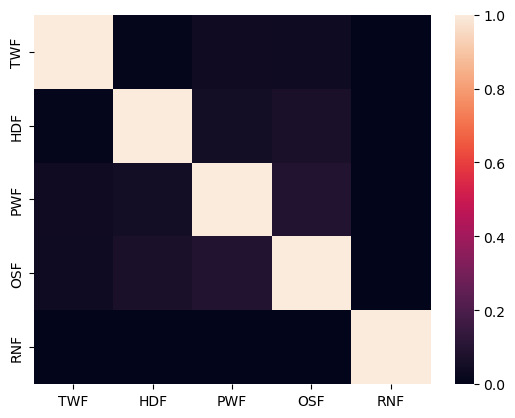

In [18]:
print(df_binary.corr())
sns.heatmap(df_binary.corr())

In [19]:
pd.pivot_table(training, index = 'Machine failure', values = ['TWF','HDF','PWF','OSF','RNF'])

,HDF,OSF,PWF,RNF,TWF
Machine failure,,,,,
0,0.000045,0.000030,0.000022,0.002249,0.000000
1,0.324953,0.249534,0.150838,0.002793,0.098696


In [20]:
binary_cols

Index(['TWF', 'HDF', 'PWF', 'OSF', 'RNF'], dtype='object')

In [21]:
for i in binary_cols:
    print(pd.pivot_table(training, index = 'Machine failure', columns = training[i], values = i, aggfunc = 'count'),'\n')

TWF                     0      1
Machine failure                 
0                134281.0    NaN
1                  1936.0  212.0 

HDF                   0    1
Machine failure             
0                134275    6
1                  1450  698 

PWF                   0    1
Machine failure             
0                134278    3
1                  1824  324 

OSF                   0    1
Machine failure             
0                134277    4
1                  1612  536 

RNF                   0    1
Machine failure             
0                133979  302
1                  2142    6 



## Feature Engineering

## Prepare Data
1) Missing values -- There are no missing values for the training data set, so no need to impute
2) Categorical Data -- We could One-hot Encode the 'Type' Column, as there are only 3 data points


In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder


In [23]:
# define encoder
OH_encoder = OneHotEncoder(handle_unknown= 'ignore', sparse = False)

train_copy = training.copy()

# encode

OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(training[['Type']]))
OH_cols_train.index = training.index
OH_cols_train

c:\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
...,...,...,...
136424,0.0,0.0,1.0
136425,1.0,0.0,0.0
136426,0.0,1.0,0.0
136427,0.0,1.0,0.0


In [24]:
# put column names back
OH_cols_train.columns = OH_encoder.get_feature_names_out()
OH_cols_train

,Type_H,Type_L,Type_M
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
...,...,...,...
136424,0.0,0.0,1.0
136425,1.0,0.0,0.0
136426,0.0,1.0,0.0
136427,0.0,1.0,0.0


In [25]:
# # put new columns back into training set
# train_copy = train_copy.drop(['Type'], axis = 1)
new_train = pd.concat([train_copy, OH_cols_train], axis = 1)

new_train

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,id_letter,Type_H,Type_L,Type_M
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,L,0.0,1.0,0.0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,M,0.0,0.0,1.0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,L,0.0,1.0,0.0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,L,0.0,1.0,0.0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,M,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,M22284,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0,M,0.0,0.0,1.0
136425,136425,H38017,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0,H,1.0,0.0,0.0
136426,136426,L54690,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0,L,0.0,1.0,0.0
136427,136427,L53876,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0,L,0.0,1.0,0.0


## Model Building and Pipeline building

### start with splitting X and y properly

In [26]:
# reassess columns on new dataset (after processing)
new_train.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF',
       'id_letter', 'Type_H', 'Type_L', 'Type_M'],
      dtype='object')

In [27]:
# select features
features = new_train.columns[3:18].drop(['Machine failure','id_letter'])
features

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF',
       'HDF', 'PWF', 'OSF', 'RNF', 'Type_H', 'Type_L', 'Type_M'],
      dtype='object')

In [28]:
# define y -- the Target
y_train = new_train['Machine failure']

# drop unwanted features from columns
# select features -- in this case, we only want to leave out product ID and Machine Failure and ID, so ---

X_train = new_train[features]

In [29]:
y_train

0         0
1         0
2         0
3         0
4         0
         ..
136424    0
136425    0
136426    0
136427    0
136428    0
Name: Machine failure, Length: 136429, dtype: int64

In [30]:
X_train

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,300.6,309.6,1596,36.1,140,0,0,0,0,0,0.0,1.0,0.0
1,302.6,312.1,1759,29.1,200,0,0,0,0,0,0.0,0.0,1.0
2,299.3,308.5,1805,26.5,25,0,0,0,0,0,0.0,1.0,0.0
3,301.0,310.9,1524,44.3,197,0,0,0,0,0,0.0,1.0,0.0
4,298.0,309.0,1641,35.4,34,0,0,0,0,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,300.1,311.4,1530,37.5,210,0,0,0,0,0,0.0,0.0,1.0
136425,297.5,308.5,1447,49.1,2,0,0,0,0,0,1.0,0.0,0.0
136426,300.5,311.8,1524,38.5,214,0,0,0,0,0,0.0,1.0,0.0
136427,301.7,310.9,1447,46.3,42,0,0,0,0,0,0.0,1.0,0.0


In [31]:
# employ multiple models for comparison purposes.
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# import for competition's score metric
from sklearn.metrics import roc_auc_score

# to cross-validate our models
from sklearn.model_selection import cross_val_score

#### Initiate Baseline Models
We will now initiate a barebone model for each of these methods. What we aim to do next will be to get a baseline reading of the Cross-validation scores of each of these methods. We will then act on a select few and tune the Parameters.

In [32]:
gnb = GaussianNB()
knn = KNeighborsClassifier()
rfr = RandomForestRegressor(random_state= 0)
rfc = RandomForestClassifier(random_state= 0)
lr = LogisticRegression(max_iter = 1000)

# initiate scoring

In [33]:
models = [rfr, rfc, gnb, lr, knn]

In [34]:
# Gaussian NB
cv = cross_val_score(gnb, X = X_train, y = y_train, cv=5, scoring = 'roc_auc')

print(cv)

[0.94896001 0.9399928  0.93914551 0.94790437 0.93826945]


In [35]:
# K-Neighbors
cv = cross_val_score(knn, X = X_train, y = y_train, cv=5, scoring = 'roc_auc')

print(cv)

[0.72088649 0.71306607 0.75213499 0.72701501 0.73469065]


In [36]:
# Logistic Regression
cv = cross_val_score(lr, X = X_train, y = y_train, cv=5, scoring = 'roc_auc')

print(cv.mean())

0.93529628363114


In [37]:
# random-forest regression
cv = cross_val_score(rfr, X = X_train, y = y_train, cv=5, scoring = 'roc_auc')

print(cv)

[0.94911541 0.92980687 0.94126647 0.94435182 0.92907719]


In [38]:
# random Forest Classifier
cv = cross_val_score(rfc, X = X_train, y = y_train, cv=5, scoring = 'roc_auc')

print(cv)

[0.94996165 0.93815249 0.95137222 0.938062   0.93890228]


In [39]:
# for model in models:
#     print(cross_val_score(model, X = X_train, y = y_train, cv=5, scoring = 'roc_auc'))

In [40]:
# categorical_transformer = Pipeline(steps = [
#     ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
# ])

# preprocessor = ColumnTransformer(
#     transformer = [
#     ('cat', categorical_transformer, 'Type')
#     ]
# )

### Parameters Tuning
Other than manually tuning, maybe we can try grid searches?